# Generation apple images with infoGAN

We first import the necesary packages

In [1]:
import os
from util import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import load_img
import natsort
from lib import gan
from infogan_rgb import *


## Functions in utils
"get_path_to_images": Function to abtain the path of each image according to it's category, along with the name of each corresponding folder.

"display_one","display_two", "display_one_gray": Functions to display images

"get_images" : Gets a numpy array of rgb images from a list of lists of paths

"unison_shuffled_copies": shuffles two arrays at unison, useul to shuffle date before feeding it in the taining phase.


In [2]:
# get "current working direntory"
cwd = os.getcwd()
image_path = cwd + '\\Apple_lite'

list_of_list_of_paths_to_img, folders_names = get_path_to_images(image_path)

# Miremos lo que GetPathToImages nos entrga 
print(list_of_list_of_paths_to_img[0][0],'\n\n',folders_names)
print('\We have ',len(list_of_list_of_paths_to_img),' lists to paths of apple images')
print('\nWe have ',len(folders_names),' categories of apples')

C:\Users\Marcos\Desktop\Recordando mis cursos de machine learning\Tarea 3\Tarea 3 Marcos Hermosilla\Apple_lite\Apple Braeburn\0_100.jpg 

 ['Apple Braeburn', 'Apple Golden 1', 'Apple Granny Smith', 'Apple Red Delicious']
\We have  4  lists to paths of apple images

We have  4  categories of apples


We create a dictionary that for each key (type of apple) has a list of the paths to each image of that category of apple

In [3]:
paths_to_images_dic = dict(zip(folders_names, list_of_list_of_paths_to_img))

We create a list listing all the apple classes

In [4]:
apple_classes = list(range(len(folders_names)))

## Number of images in each class

We define the labels and print the number of images in each folder.

In [5]:
i = 0
apple_labels = []
for key, file_paths in paths_to_images_dic.items():
    print("# Elements in category",'-',key, ":", len(file_paths))
    apple_labels = apple_labels +  [apple_classes[i]]*len(file_paths)
    i = i + 1

# Elements in category - Apple Braeburn : 656
# Elements in category - Apple Golden 1 : 640
# Elements in category - Apple Granny Smith : 656
# Elements in category - Apple Red Delicious : 656


Transform the labels to the same format as the MNIST labels (original GAN used in that dataset)

In [6]:
apple_labels = np.array(apple_labels)
apple_labels = apple_labels.astype('uint8')

#Guardar apple_labels en numpy
with open('apple_labels.npy', 'wb') as f:
    np.save(f, np.array(apple_labels))

We can calculate the total number of images/tags as:

In [7]:
print(len(apple_labels))

2608


## Load images and resize to 64x64

We use the get_images function to get a list of rgb array lists. We pass everything to an np.float32 array of shape (8538, n, n, 3) with n the size chosen for the images, the original ones are 100x100, if the computer can, in principle we can use the 100x100 ones, in case of that the computer cannot, we can choose a smaller n. 

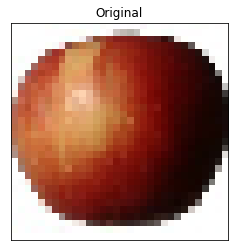

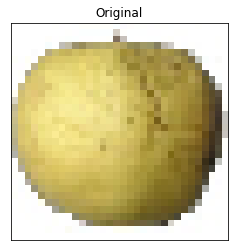

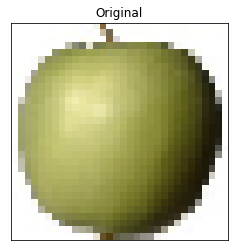

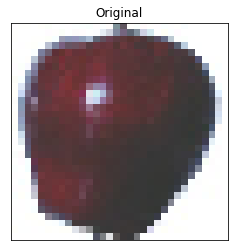

list_of_list_of_rgb_images_arrays is type =  <class 'list'>  and lenght  4
list_of_list_of_rgb_images_arrays[0] is type =  <class 'list'>  and lenght  656
list_of_list_of_rgb_images_arrays[0][0] is type =  <class 'numpy.ndarray'>  and shape  (32, 32, 3)


In [12]:
n = 32
list_of_list_of_rgb_images_arrays = get_images(list_of_list_of_paths_to_img, n)
aux_llrgb = list_of_list_of_rgb_images_arrays
print('list_of_list_of_rgb_images_arrays is type = ', type(aux_llrgb),' and lenght ', len(aux_llrgb))
print('list_of_list_of_rgb_images_arrays[0] is type = ', type(aux_llrgb[0]),' and lenght ', len(aux_llrgb[0]))
print('list_of_list_of_rgb_images_arrays[0][0] is type = ', type(aux_llrgb[0][0]),' and shape ', aux_llrgb[0][0].shape)

In [13]:
image_size = list_of_list_of_rgb_images_arrays[0][0].shape[0]

# reshape de (100, 100, 3) a (-1,100, 100, 3)

aux = np.zeros((len(apple_labels), image_size, image_size, 3), dtype = np.float32)
i = 0
for list_of_rgb_images_arrays in list_of_list_of_rgb_images_arrays:
    for rgb_image_array in list_of_rgb_images_arrays:
        aux[i] = rgb_image_array
        i += 1
        
img_array = aux

print(img_array.shape)  


(2608, 32, 32, 3)


In [14]:

#Save numpy images 

with open('Manzanas_' + str(n) + '.npy', 'wb') as f:
    np.save(f, np.array(img_array))
    

## Load numpy files with images and labels

Section to load the images according to the chosen number

In [15]:
n = 32

with open('Manzanas_' + str(n) + '.npy', 'rb') as f:
    img_array = np.load(f)
    
with open('apple_labels.npy', 'rb') as f:
    apple_labels = np.load(f)

## Train InfoGAN

We use the infoGAN implementation of "Advanced Deep Learning with Keras", originally used on the MNIST dataset, here I have adjusted the functions to work with rgb images and generate the necessary number of categories

I used 20000 or 40000 training steps, I trained one of n=32 n=64 and n=100.

Credits to the original paper by infoGAN:

"Unsupervised representation learning with deep convolutional generative adversarial networks." arXiv preprint arXiv:1511.06434 (2015)

In [16]:

my_latent_size = 200

build_and_train_models(img_array, apple_labels, latent_size=my_latent_size, train_steps_in=20000)

## Let's see the images generated in the training.

Load Model and view images by turning the knobs.

In [17]:
from tensorflow.keras.models import load_model

Varying p1 and not p2

In [26]:
generator = load_model("infogan_apples_img_size_32.h5", compile=False)
apple_classes

[0, 1, 2, 3]

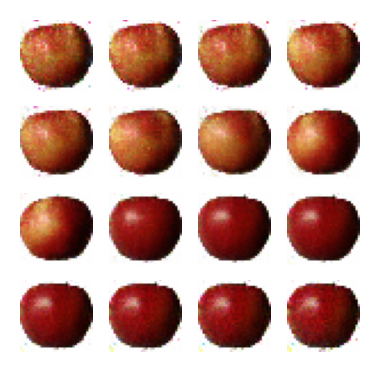

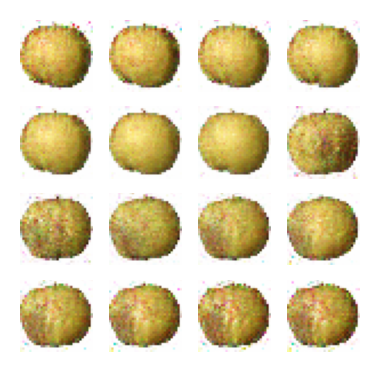

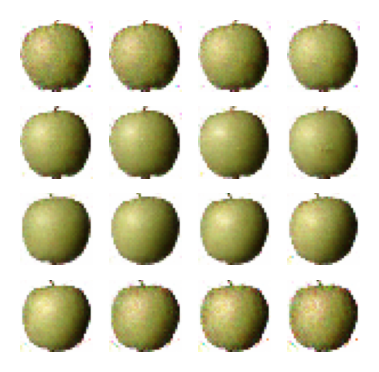

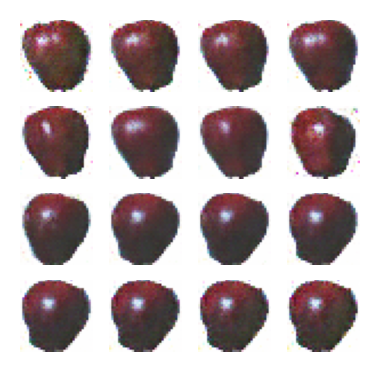

In [30]:
dpi = 200
num_imgs = 16
num_labels = len(apple_classes)

for label in range(num_labels):  
    code1 = 0
    code2 = 0
    p1 = True
    p2 = None    
    code1 = code1
    code2 = code2
    p1 = p1
    p2 = p2
    params = (label, num_labels, code1, code2, p1, p2)
    test_generator(generator, params, latent_size=my_latent_size, num_imgs=num_imgs, dpi=dpi)

Varying p2 and not p1

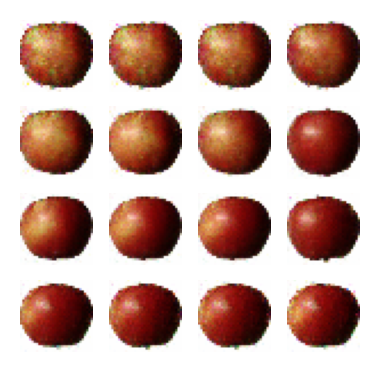

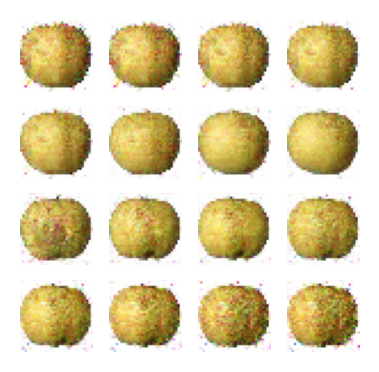

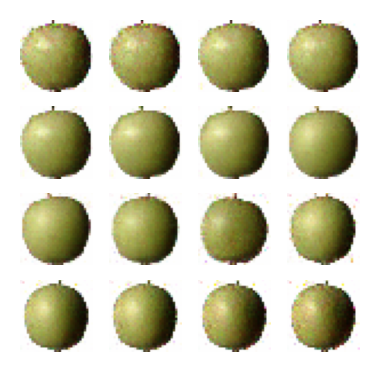

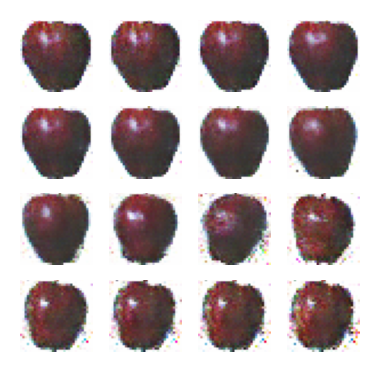

In [31]:
for label in range(num_labels):  
    code1 = 0
    code2 = 0
    p1 = None
    p2 = True    
    code1 = code1
    code2 = code2
    p1 = p1
    p2 = p2
    params = (label, num_labels, code1, code2, p1, p2)
    test_generator(generator, params, latent_size=my_latent_size, num_imgs=num_imgs, dpi=dpi)

## Final comments

Although I adapted the GAN network to work with RGB images (small changes), I did not change the architecture of the network much, so we are using a GAN designed primarily to work on the MNIST dataset